In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def speed_of_sound(z):
    T0 = 288.15  
    L = 0.0065  
    g = 9.81  
    R = 287.05 
    T = T0 - L * z
    v = np.sqrt(1.4 * R * T)
    return v

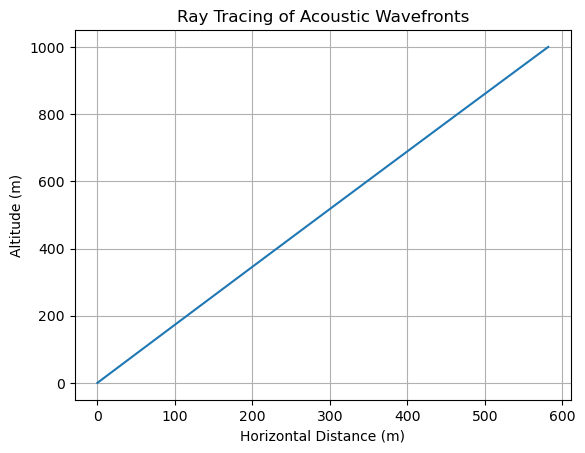

In [3]:
z0 = 0 
theta0 = np.radians(30)  
dz = 10  
max_height = 1000  

z_list = [z0]
x_list = [0]
theta_list = [theta0]

# Ray tracing loop
z = z0
x = 0
theta = theta0

while z < max_height:
    v = speed_of_sound(z)
    z += dz
    v_new = speed_of_sound(z)
    theta = np.arcsin((v / v_new) * np.sin(theta))
    x += dz * np.tan(theta)
    z_list.append(z)
    x_list.append(x)
    theta_list.append(theta)

# Plot the ray path
plt.plot(x_list, z_list)
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Altitude (m)')
plt.title('Ray Tracing of Acoustic Wavefronts')
plt.grid()
plt.show()

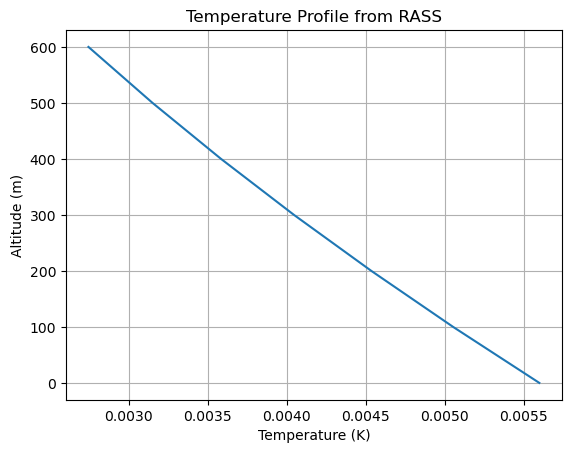

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
gamma = 1.4
R = 287.05

# Hypothetical Doppler shift data (in Hz) and corresponding altitudes (in meters)
doppler_shifts = [100, 95, 90, 85, 80, 75, 70]
altitudes = [0, 100, 200, 300, 400, 500, 600]
radar_wavelength = 0.03  # Radar wavelength in meters

# Calculate speed of sound from Doppler shifts
speed_of_sound = [shift * radar_wavelength / 2 for shift in doppler_shifts]

# Calculate temperature from speed of sound
temperatures = [(v ** 2) / (gamma * R) for v in speed_of_sound]

# Plot temperature profile
plt.plot(temperatures, altitudes)
plt.xlabel('Temperature (K)')
plt.ylabel('Altitude (m)')
plt.title('Temperature Profile from RASS')
plt.grid(True)
plt.show()


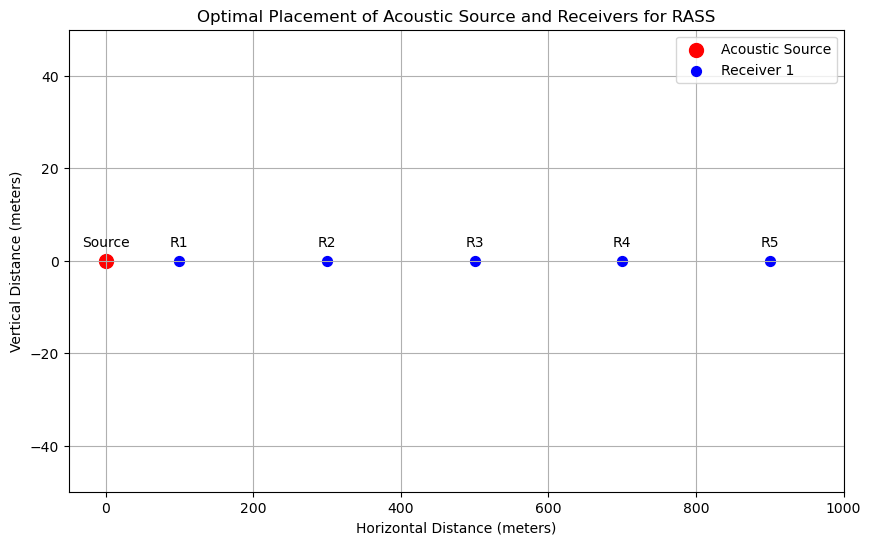

In [5]:
import numpy as np
import matplotlib.pyplot as plt

source_position = (0, 0)
receiver_positions = [(100, 0), (300, 0), (500, 0), (700, 0), (900, 0)]

plt.figure(figsize=(10, 6))

plt.scatter(*source_position, color='red', label='Acoustic Source', s=100)


for idx, pos in enumerate(receiver_positions):
    plt.scatter(*pos, color='blue', label=f'Receiver {idx+1}' if idx == 0 else "", s=50)

plt.annotate('Source', source_position, textcoords="offset points", xytext=(0,10), ha='center')
for idx, pos in enumerate(receiver_positions):
    plt.annotate(f'R{idx+1}', pos, textcoords="offset points", xytext=(0,10), ha='center')

plt.xlim(-50, 1000)
plt.ylim(-50, 50)
plt.xlabel('Horizontal Distance (meters)')
plt.ylabel('Vertical Distance (meters)')
plt.title('Optimal Placement of Acoustic Source and Receivers for RASS')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import numpy as np
from scipy.integrate import solve_ivp

# Define constants
c0 = 343  # Reference speed of sound in air at 20 degrees Celsius in m/s

# Function to compute the local speed of sound as a function of height
def speed_of_sound(T):
    return np.sqrt(1.4 * 287.05 * T)

# Function for the system of differential equations
def ray_equations(s, y, T_profile, z_profile):
    x, z, dx_ds, dz_ds = y
    c = np.interp(z, z_profile, T_profile)
    n = c0 / c
    
    d2x_ds2 = - (n / c) * np.gradient(np.gradient(x)) # Simplified for illustration
    d2z_ds2 = - (n / c) * np.gradient(np.gradient(z)) # Simplified for illustration
    
    return [dx_ds, dz_ds, d2x_ds2, d2z_ds2]

# Initial conditions
initial_conditions = [0, 0, np.cos(np.radians(45)), np.sin(np.radians(45))]  # [x0, z0, dx/ds0, dz/ds0]

# Profile of temperature as a function of height (simplified example)
z_profile = np.linspace(0, 10000, 100)  # Height from 0 to 10 km
T_profile = 273.15 + 15 - 0.0065 * z_profile  # Linear temperature decrease

# Solve the differential equations
solution = solve_ivp(ray_equations, [0, 10000], initial_conditions, args=(T_profile, z_profile), dense_output=True)

# Extract the solution
s = np.linspace(0, 10000, 1000)
x, z, _, _ = solution.sol(s)

# Plot the ray path
import matplotlib.pyplot as plt
plt.plot(x, z)
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Height (m)')
plt.title('Ray Path of Acoustic Wave')
plt.show()


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

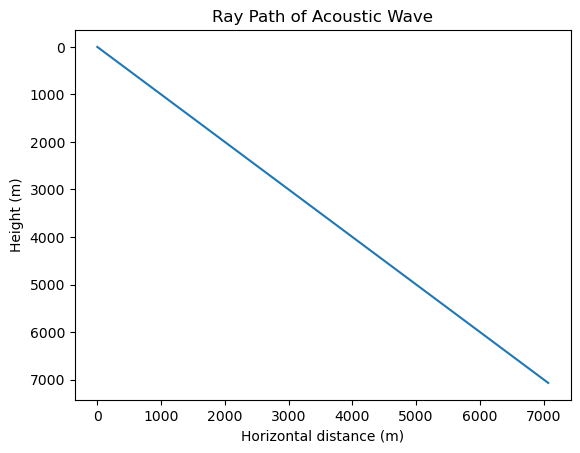

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
c0 = 343  # Speed of sound at reference temperature in m/s

# Function to compute the local speed of sound as a function of height
def speed_of_sound(T):
    return np.sqrt(1.4 * 287.05 * T)

# Function for the system of differential equations
def ray_equations(s, y, T_profile, z_profile):
    x, z, dx_ds, dz_ds = y
    T = np.interp(z, z_profile, T_profile)
    c = speed_of_sound(T)
    n = c0 / c
    
    # Assuming horizontal wind is negligible, otherwise add wind profile effect here
    ddx_ds2 = 0
    ddz_ds2 = 0
    
    return [dx_ds, dz_ds, ddx_ds2, ddz_ds2]

# Initial conditions
initial_conditions = [0, 0, np.cos(np.radians(45)), np.sin(np.radians(45))]  # [x0, z0, dx/ds0, dz/ds0]

# Profile of temperature as a function of height (simplified example)
z_profile = np.linspace(0, 10000, 100)  # Height from 0 to 10 km
T_profile = 273.15 + 15 - 0.0065 * z_profile  # Linear temperature decrease

# Solve the differential equations
solution = solve_ivp(ray_equations, [0, 10000], initial_conditions, args=(T_profile, z_profile), dense_output=True)

# Extract the solution
s = np.linspace(0, 10000, 1000)
sol = solution.sol(s)
x, z = sol[0], sol[1]

# Plot the ray path
plt.plot(x, z)
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Height (m)')
plt.title('Ray Path of Acoustic Wave')
plt.gca().invert_yaxis()  # Invert y-axis to match typical atmospheric profiles
plt.show()


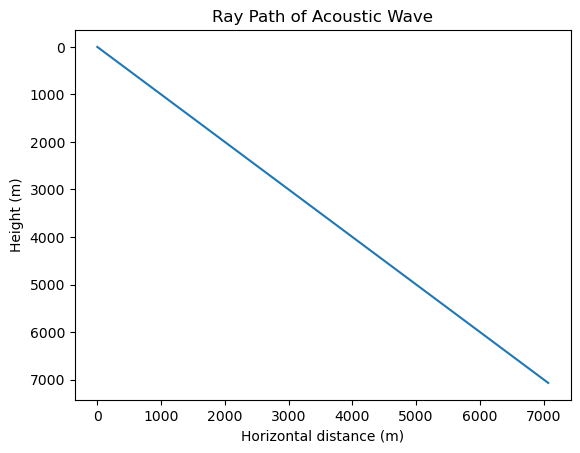

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
c0 = 343  # Speed of sound at reference temperature in m/s

# Function to compute the local speed of sound as a function of temperature
def speed_of_sound(T):
    return np.sqrt(1.4 * 287.05 * T)

# Ray tracing differential equations
def ray_equations(s, y, T_profile, z_profile):
    x, z, dx_ds, dz_ds = y
    T = np.interp(z, z_profile, T_profile)
    c = speed_of_sound(T)
    n = c0 / c
    
    # Update the direction of the ray
    d2x_ds2 = 0  # Assuming no horizontal wind gradient
    d2z_ds2 = 0  # Assuming no vertical wind gradient

    return [dx_ds, dz_ds, d2x_ds2, d2z_ds2]

# Initial conditions
initial_conditions = [0, 0, np.cos(np.radians(45)), np.sin(np.radians(45))]  # [x0, z0, dx/ds0, dz/ds0]

# Profile of temperature as a function of height (simplified example)
z_profile = np.linspace(0, 10000, 100)  # Height from 0 to 10 km
T_profile = 273.15 + 15 - 0.0065 * z_profile  # Linear temperature decrease


# Solve the differential equations
solution = solve_ivp(ray_equations, [0, 10000], initial_conditions, args=(T_profile, z_profile), dense_output=True)

# Extract the solution
s = np.linspace(0, 10000, 1000)
sol = solution.sol(s)
x, z = sol[0], sol[1]

# Plot the ray path
plt.plot(x, z)
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Height (m)')
plt.title('Ray Path of Acoustic Wave')
plt.gca().invert_yaxis()  # Invert y-axis to match typical atmospheric profiles
plt.show()


TypeError: invalid number of arguments

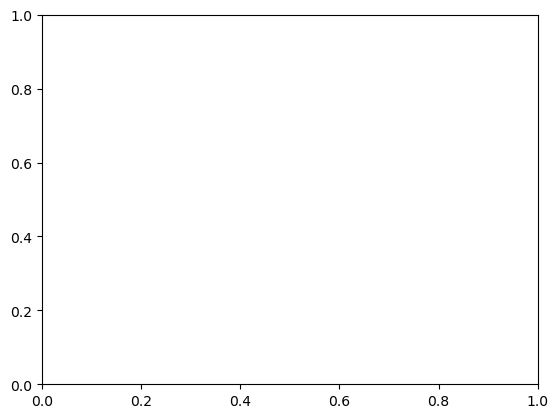

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
c0 = 343  # Speed of sound at reference temperature in m/s
T = 0;

# Function to compute the local speed of sound as a function of temperature
def speed_of_sound(T):
    return np.sqrt(1.4 * 287.05 * T)

# Ray tracing differential equations
def ray_equations(s, y, T_profile, z_profile):
    x, z, dx_ds, dz_ds = y
    T = np.interp(z, z_profile, T_profile)
    c = speed_of_sound(T)
    n = c0 / c
    
    d2x_ds2 = 0  # Assuming no horizontal wind gradient
    d2z_ds2 = - (1/c) * np.gradient(c, z_profile)[np.searchsorted(z_profile, z)] * dz_ds

    return [dx_ds, dz_ds, d2x_ds2, d2z_ds2]


z_profile = np.linspace(0, 30000, 100)  
#T_profile = 273.15 + 15 - 0.0065 * z_profile  # Linear temperature decrease

# Solve the differential equations for multiple initial angles
angles = np.linspace(0, 180, 1)  # Launch angles from 30 to 60 degrees
fig, ax = plt.subplots()
for angle in angles:
    initial_conditions = [0, 0, np.cos(np.radians(angle)), np.sin(np.radians(angle))]  # [x0, z0, dx/ds0, dz/ds0]
    solution = solve_ivp(ray_equations, [0, 10000], initial_conditions, args=(T_profile, z_profile), dense_output=True)
    s = np.linspace(0, 10000, 1000)
    sol = solution.sol(s)
    x, z = sol[0], sol[1]
    ax.plot(x, z, label=f'{angle}°')
    
ax.set_xlabel('Horizontal distance (m)')
ax.set_ylabel('Height (m)')
ax.set_title('Ray Paths of Acoustic Wavefronts')
ax.invert_yaxis()  # Invert y-axis to match typical atmospheric profiles
ax.legend()
plt.show()


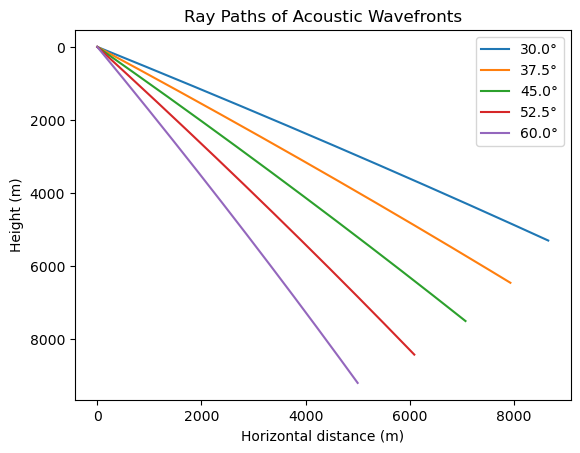

Angle: 30.0° | Distance from source: 8660.25 m | Altitude: 5305.77 m
Angle: 37.5° | Distance from source: 7933.53 m | Altitude: 6463.37 m
Angle: 45.0° | Distance from source: 7071.07 m | Altitude: 7511.70 m
Angle: 52.5° | Distance from source: 6087.61 m | Altitude: 8431.64 m
Angle: 60.0° | Distance from source: 5000.00 m | Altitude: 9207.80 m


In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
c0 = 343  # Speed of sound at reference temperature in m/s

# Function to compute the local speed of sound as a function of temperature
def speed_of_sound(T):
    return np.sqrt(1.4 * 287.05 * T)

# Ray tracing differential equations
def ray_equations(s, y, T_profile, z_profile):
    x, z, dx_ds, dz_ds = y
    T = np.interp(z, z_profile, T_profile)
    c = speed_of_sound(T)
    c_grad = np.gradient(speed_of_sound(T_profile), z_profile)
    d2x_ds2 = 0  # Assuming no horizontal wind gradient
    d2z_ds2 = -(1 / c) * c_grad[np.searchsorted(z_profile, z)] * dz_ds
    return [dx_ds, dz_ds, d2x_ds2, d2z_ds2]

z_profile = np.linspace(0, 10000, 100)  # Height from 0 to 10 km
T_profile = 273.15 + 15 - 0.0065 * z_profile  # Linear temperature decrease


angles = np.linspace(30, 60, 5)  # Launch angles from 30 to 60 degrees
fig, ax = plt.subplots()
distances = []
altitudes = []

for angle in angles:
    initial_conditions = [0, 0, np.cos(np.radians(angle)), np.sin(np.radians(angle))]  # [x0, z0, dx/ds0, dz/ds0]
    solution = solve_ivp(ray_equations, [0, 10000], initial_conditions, args=(T_profile, z_profile), dense_output=True)
    s = np.linspace(0, 10000, 1000)
    sol = solution.sol(s)
    x, z = sol[0], sol[1]
    ax.plot(x, z, label=f'{angle}°')
    distances.append(x[-1])
    altitudes.append(z[-1])

ax.set_xlabel('Horizontal distance (m)')
ax.set_ylabel('Height (m)')
ax.set_title('Ray Paths of Acoustic Wavefronts')
ax.invert_yaxis()  # Invert y-axis to match typical atmospheric profiles
ax.legend()
plt.show()

for angle, distance, altitude in zip(angles, distances, altitudes):
    print(f"Angle: {angle}° | Distance from source: {distance:.2f} m | Altitude: {altitude:.2f} m")


In [15]:
import numpy as np
import pyart
import matplotlib.pyplot as plt

# Generate some sample radar data
nyquist_velocity = 10  # m/s
gate_spacing = 100  # meters
n_gates = 100
n_elevations = 10

velocity_data = np.random.uniform(-nyquist_velocity, nyquist_velocity, (n_elevations, n_gates))

# Create a Py-ART radar object
radar = pyart.testing.make_target_radar(n_gates, n_elevations, nyquist_velocity)

# Populate the velocity field with the generated data
radar.fields['velocity']['data'] = velocity_data

# Plot the Doppler velocity field
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
display.plot_rhi('velocity', vmin=-nyquist_velocity, vmax=nyquist_velocity, ax=ax)
plt.xlabel('Distance from radar (km)')
plt.ylabel('Height above radar (km)')
plt.title('Doppler Velocity Profile')
plt.grid()
plt.colorbar(label='Velocity (m/s)')
plt.show()


ModuleNotFoundError: No module named 'pyart'

In [14]:
pip install pyart

  Using cached pyart-0.2.3.tar.gz (47 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-02k7hi7e/pyart_95fccfc605944a919bfd743688eb025c/setup.py", line 139, in <module>
          kwargs['sources'] = prepare_sources(kwargs['sources'])
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/tmp/pip-install-02k7hi7e/pyart_95fccfc605944a919bfd743688eb025c/setup.py", line 121, in prepare_sources
          return [to_string(source) for source in sources]
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/tmp/pip-install-02k7hi7e/pyart_95fccfc605944a919bfd743688eb025c/setup.py", line 121, in <listcomp>
          return [to_string(source) 

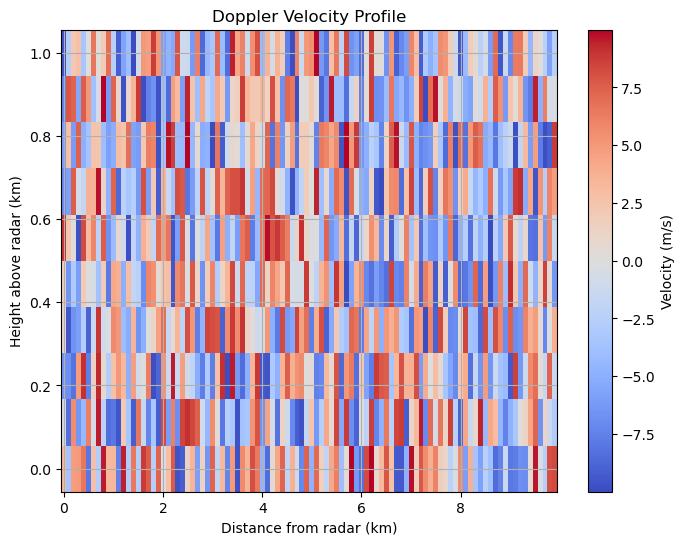

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample radar data
nyquist_velocity = 10  # m/s
gate_spacing = 100  # meters
n_gates = 100
n_elevations = 10

velocity_data = np.random.uniform(-nyquist_velocity, nyquist_velocity, (n_elevations, n_gates))

# Create range and height arrays
ranges = np.arange(0, n_gates * gate_spacing, gate_spacing)
heights = np.linspace(0, n_elevations * gate_spacing, n_elevations)

# Plot the Doppler velocity profile
plt.figure(figsize=(8, 6))
plt.pcolormesh(ranges / 1000, heights / 1000, velocity_data, cmap='coolwarm', shading='auto')
plt.colorbar(label='Velocity (m/s)')
plt.xlabel('Distance from radar (km)')
plt.ylabel('Height above radar (km)')
plt.title('Doppler Velocity Profile')
plt.grid()
plt.show()

/tmp/ipykernel_12470/1301134977.py:40: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  return wavefront.collections


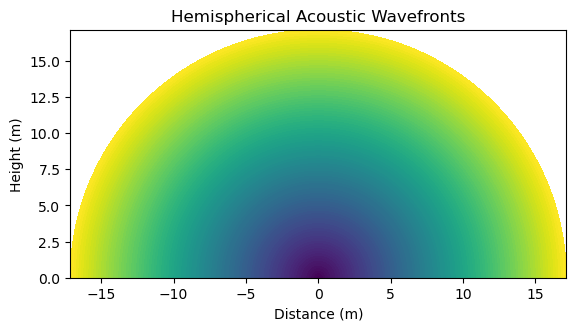

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
c = 343  # Speed of sound in air (m/s)
t_end = 0.05  # End time (s)
dt = 0.001  # Time step (s)
r_max = c * t_end  # Maximum radius (m)
n_points = 500  # Number of points for plotting

# Generate a grid
x = np.linspace(-r_max, r_max, n_points)
y = np.linspace(0, r_max, n_points)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# Create figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-r_max, r_max)
ax.set_ylim(0, r_max)
ax.set_aspect('equal')
ax.set_title('Hemispherical Acoustic Wavefronts')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')
wavefront = ax.contourf(X, Y, R, levels=np.linspace(0, r_max, 100), cmap='viridis')

# Update function for animation
def update(frame):
    ax.clear()
    ax.set_xlim(-r_max, r_max)
    ax.set_ylim(0, r_max)
    ax.set_aspect('equal')
    ax.set_title('Hemispherical Acoustic Wavefronts')
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Height (m)')
    time = frame * dt
    radius = c * time
    wavefront = ax.contourf(X, Y, np.abs(R - radius), levels=np.linspace(0, r_max, 100), cmap='viridis')
    return wavefront.collections

# Create animation
ani = FuncAnimation(fig, update, frames=int(t_end / dt), interval=50, blit=True)
plt.show()


/tmp/ipykernel_12470/2040025143.py:46: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  return wavefront.collections


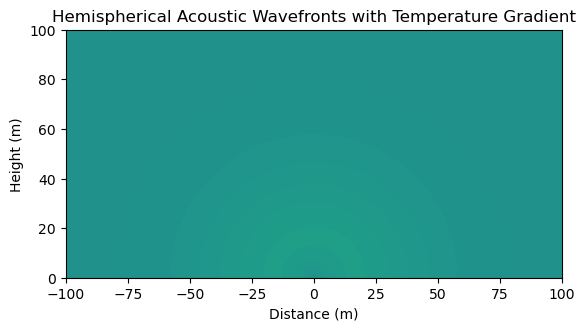

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
T0 = 20  # Surface temperature in degrees Celsius
gradient = -0.0065  # Temperature lapse rate in degrees Celsius per meter
c0 = 331.3 + 0.6 * T0  # Speed of sound at surface temperature
t_end = 0.05  # End time (s)
dt = 0.001  # Time step (s)
n_points = 500  # Number of points for plotting

# Create a grid
x = np.linspace(-100, 100, n_points)
y = np.linspace(0, 100, n_points)
X, Y = np.meshgrid(x, y)

# Calculate temperature and speed of sound at each height
T = T0 + gradient * Y
c = 331.3 + 0.6 * T

# Create figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-100, 100)
ax.set_ylim(0, 100)
ax.set_aspect('equal')
ax.set_title('Hemispherical Acoustic Wavefronts with Temperature Gradient')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')
wavefront = ax.contourf(X, Y, np.zeros_like(X), levels=np.linspace(0, 200, 100), cmap='viridis' )

# Update function for animation
def update(frame):
    ax.clear()
    ax.set_xlim(-100, 100)
    ax.set_ylim(0, 100)
    ax.set_aspect('equal')
    ax.set_title('Hemispherical Acoustic Wavefronts with Temperature Gradient')
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Height (m)')
    time = frame * dt
    R = np.sqrt(X**2 + Y**2)
    phase = R / c
    amplitude = np.exp(-R / (c0 * t_end))
    wavefront = ax.contourf(X, Y, amplitude * np.sin(2 * np.pi * (phase - time)), levels=np.linspace(-1, 1, 100), cmap='viridis')
    return wavefront.collections

# Create animation
ani = FuncAnimation(fig, update, frames=int(t_end / dt), interval=50, blit=True)
plt.show()


/tmp/ipykernel_12470/3470999201.py:49: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  return wavefront.collections


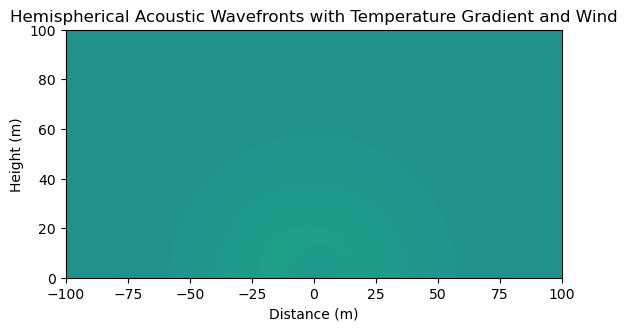

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
T0 = 20  # Surface temperature in degrees Celsius
gradient = -0.0065  # Temperature lapse rate in degrees Celsius per meter
wind_speed = 10  # Wind speed in m/s (constant wind in the x-direction)
c0 = 331.3 + 0.6 * T0  # Speed of sound at surface temperature
t_end = 0.05  # End time (s)
dt = 0.001  # Time step (s)
n_points = 500  # Number of points for plotting

# Create a grid
x = np.linspace(-100, 100, n_points)
y = np.linspace(0, 100, n_points)
X, Y = np.meshgrid(x, y)

# Calculate temperature and speed of sound at each height
T = T0 + gradient * Y
c = 331.3 + 0.6 * T

# Create figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-100, 100)
ax.set_ylim(0, 100)
ax.set_aspect('equal')
ax.set_title('Hemispherical Acoustic Wavefronts with Temperature Gradient and Wind')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')
wavefront = ax.contourf(X, Y, np.zeros_like(X), levels=np.linspace(0, 200, 100), cmap='viridis')

# Update function for animation
def update(frame):
    ax.clear()
    ax.set_xlim(-100, 100)
    ax.set_ylim(0, 100)
    ax.set_aspect('equal')
    ax.set_title('Hemispherical Acoustic Wavefronts with Temperature Gradient and Wind')
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Height (m)')
    time = frame * dt
    # Effective propagation speed with wind in the x-direction
    effective_c = c + wind_speed * (X / np.sqrt(X**2 + Y**2))
    R = np.sqrt(X**2 + Y**2)
    phase = R / effective_c
    amplitude = np.exp(-R / (c0 * t_end))
    wavefront = ax.contourf(X, Y, amplitude * np.sin(2 * np.pi * (phase - time)), levels=np.linspace(-1, 1, 100), cmap='viridis')
    return wavefront.collections

# Create animation
ani = FuncAnimation(fig, update, frames=int(t_end / dt), interval=50, blit=True)
plt.show()


Wavefront intersects with antenna array at time 0.18s at position (47.90, 40.28)
Wavefront intersects with antenna array at time 0.19s at position (49.10, 40.08)
Wavefront intersects with antenna array at time 0.20s at position (49.10, 40.08)
Wavefront intersects with antenna array at time 0.21s at position (49.10, 40.08)
Wavefront intersects with antenna array at time 0.22s at position (49.10, 40.08)
Wavefront intersects with antenna array at time 0.23s at position (49.10, 40.08)
Wavefront intersects with antenna array at time 0.24s at position (49.10, 40.08)
Wavefront intersects with antenna array at time 0.25s at position (49.10, 40.08)
Wavefront intersects with antenna array at time 0.26s at position (49.10, 40.08)
Wavefront intersects with antenna array at time 0.27s at position (49.10, 40.08)
Wavefront intersects with antenna array at time 0.28s at position (49.10, 40.08)
Wavefront intersects with antenna array at time 0.29s at position (49.10, 40.08)
Wavefront intersects with an

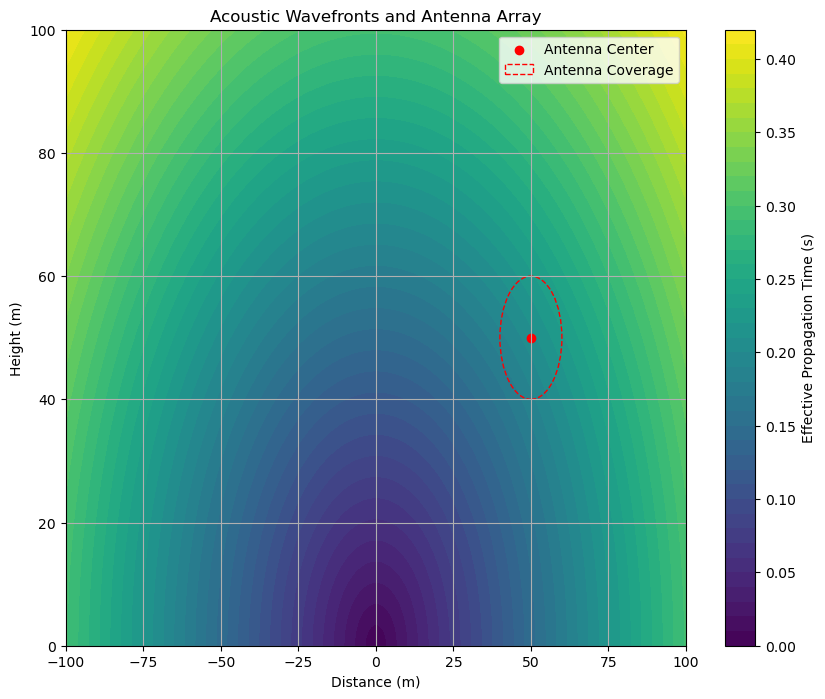

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T0 = 20  # Surface temperature in degrees Celsius
gradient = -0.0065  # Temperature lapse rate in degrees Celsius per meter
wind_speed = 10  # Wind speed in m/s (constant wind in the x-direction)
c0 = 331.3 + 0.6 * T0  # Speed of sound at surface temperature
dt = 0.01  # Time step (s)
total_time = 0.5  # Total time for simulation (s)
n_points = 500  # Number of points for plotting

# Antenna array position and dimensions
antenna_center = np.array([50, 50])  # Center position of the antenna array (x, y)
antenna_radius = 10  # Radius of the antenna array coverage

# Create a grid
x = np.linspace(-100, 100, n_points)
y = np.linspace(0, 100, n_points)
X, Y = np.meshgrid(x, y)

# Calculate temperature and speed of sound at each height
T = T0 + gradient * Y
c = 331.3 + 0.6 * T

# Initial positions and wavefronts
source_position = np.array([0, 0])
wavefront_positions = []

# Simulation
for time in np.arange(0, total_time, dt):
    # Calculate the effective propagation speed with wind
    R = np.sqrt(X**2 + Y**2)
    effective_c = c + wind_speed * (X / R)
    
    # Predict wavefront location at the current time
    phase = R / effective_c
    wavefront = phase <= time
    wavefront_positions.append((X[wavefront], Y[wavefront]))

    # Check if any wavefront falls within the antenna array
    for wx, wy in zip(X[wavefront], Y[wavefront]):
        distance_to_antenna = np.sqrt((wx - antenna_center[0])**2 + (wy - antenna_center[1])**2)
        if distance_to_antenna <= antenna_radius:
            print(f"Wavefront intersects with antenna array at time {time:.2f}s at position ({wx:.2f}, {wy:.2f})")
            break

# Plot the final wavefront positions and antenna array
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, R / c, levels=50, cmap='viridis')
plt.colorbar(label='Effective Propagation Time (s)')
plt.scatter(*antenna_center, color='red', label='Antenna Center')
circle = plt.Circle(antenna_center, antenna_radius, color='red', fill=False, linestyle='dashed', label='Antenna Coverage')
plt.gca().add_patch(circle)
plt.title('Acoustic Wavefronts and Antenna Array')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid()
plt.show()


In [2]:
import numpy as np
from scipy.integrate import solve_ivp

# Constants and parameters (example values)
v_x = 0
v_y = 0
c_s = 1.0  # Acoustic speed, may vary with z
def cs(z):
    # Define the variation of c_s with z if necessary
    return 1.0

def partial_cs_partial_z(z):
    # Define the partial derivative of c_s with respect to z
    return 0.0

def partial_vx_partial_z(z):
    # Define the partial derivative of v_x with respect to z
    return 0.0

def partial_vy_partial_z(z):
    # Define the partial derivative of v_y with respect to z
    return 0.0

# Initial conditions
x0, y0, z0 = 0, 0, 0
theta0, phi0 = np.pi/4, np.pi/4  # Example initial angles

# Define the system of ODEs
def system(t, y):
    x, y, z, theta = y
    dx_dt = v_x + c_s * np.sin(theta) * np.cos(phi0)
    dy_dt = v_y + c_s * np.sin(theta) * np.sin(phi0)
    dz_dt = c_s * np.cos(theta)
    dtheta_dt = np.sin(theta) * (partial_cs_partial_z(z) + np.sin(theta) * (np.cos(phi0) * partial_vx_partial_z(z) + np.sin(phi0) * partial_vy_partial_z(z)))
    return [dx_dt, dy_dt, dz_dt, dtheta_dt]

# Time span for the integration
t_span = (0, 10)  # from t=0 to t=10
y0 = [x0, y0, z0, theta0]

# Solve the system of ODEs
sol = solve_ivp(system, t_span, y0, method='RK45')

# Extract the solution
x, y, z, theta = sol.y

print(x,y,z,theta)

[0.00000000e+00 4.99364190e-04 5.49300609e-03 5.54294251e-02
 5.54793615e-01 5.00000000e+00] [0.00000000e+00 4.99364190e-04 5.49300609e-03 5.54294251e-02
 5.54793615e-01 5.00000000e+00] [0.00000000e+00 7.06207610e-04 7.76828371e-03 7.83890447e-02
 7.84596654e-01 7.07106781e+00] [0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816]
